# Jupyter Notebooks - part 2
* ### Data analysis and plotting

In this lesson you will learn 
- to do some interactive data analysis 
- to produce nice plots with seaborn
- that interactive plotting in Octave or R notebooks is just as easy 

## Exploratory data analysis in Jupyter

We start with three important Python packages
- `matplotlib` is the standard Python package for plotting, "grandfather of all Python visualization packages"
- `numpy` is the fundamental package for scientific computing with Python
- `pandas` is a more recently developed package for data manipulation and analysis 

We will download and process a dataset on Nobel prizes. 

### pandas
* powerful high-level tool for data exploration
* two fundamental data structures which can be applied to many types of data: `Series` and `DataFrames`  

### Seaborn

- while `matplotlib` is extremely powerful, it can also be complex. 
- sometimes much effort needed to get good-looking graphs
- `seaborn` is a higher-level visualization package based on `matplotlib`
- default visualization much more appealing compared to `matplotlib`!


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pandas defines a `read_csv` function that can read any CSV file. By giving the URL to the file, Pandas will automatically download and parse the file, and return a `DataFrame` object. We need to specify a few options to make sure the dates are parsed correctly.

In [85]:
# dataset from http://oppnadata.se/en/dataset/nobel-prizes/resource/f3da8ba9-a17f-4911-9003-4bcef93619cc
nobel = pd.read_csv("data/nobels.csv")

The `nobel` variable now contains a `DataFrame` object, a Pandas data structure that contains 2D tabular data. The `head(n)` method displays the first `n` rows of this table.

In [83]:
nobel.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France


Add column with ones (one Nobel prize per laureate...)

In [22]:
nobel["number"]=1

In [81]:
nobel.count()

id                   973
firstname            967
surname              937
born                 973
died                 973
bornCountry          941
bornCountryCode      941
bornCity             939
diedCountry          603
diedCountryCode      602
diedCity             597
gender               973
year                 967
category             967
overallMotivation     16
share                967
motivation           879
name                 720
city                 714
country              714
number               973
dtype: int64

### <font color="red"> *Exercise*

- Use the groupby method and `sum()` to extract total numbers of Nobel prizes by country

### <font color="green"> *Solution* </font>

In [24]:
nobels_by_country = nobel.groupby('bornCountry',sort=True)["number"].sum()
nobels_by_country

bornCountry
Argentina                                           4
Australia                                          11
Austria                                            15
Austria-Hungary (now Austria)                       2
Austria-Hungary (now Bosnia and Herzegovina)        1
Austria-Hungary (now Croatia)                       1
Austria-Hungary (now Czech Republic)                4
Austria-Hungary (now Hungary)                       3
Austria-Hungary (now Poland)                        1
Austria-Hungary (now Slovenia)                      1
Austria-Hungary (now Ukraine)                       1
Austrian Empire (now Austria)                       2
Austrian Empire (now Czech Republic)                1
Austrian Empire (now Italy)                         1
Bavaria (now Germany)                               1
Belgium                                             9
Bosnia (now Bosnia and Herzegovina)                 1
Brazil                                              1
British India (n

In [25]:
nobels_by_country.describe()

count    121.000000
mean       7.776860
std       27.226974
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max      275.000000
Name: number, dtype: float64

The pandas Series only shows a limited number of rows. Let's print them all

In [80]:
print(nobels_by_country.to_string())

bornCountry
Argentina                                           4
Australia                                          11
Austria                                            15
Austria-Hungary (now Austria)                       2
Austria-Hungary (now Bosnia and Herzegovina)        1
Austria-Hungary (now Croatia)                       1
Austria-Hungary (now Czech Republic)                4
Austria-Hungary (now Hungary)                       3
Austria-Hungary (now Poland)                        1
Austria-Hungary (now Slovenia)                      1
Austria-Hungary (now Ukraine)                       1
Austrian Empire (now Austria)                       2
Austrian Empire (now Czech Republic)                1
Austrian Empire (now Italy)                         1
Bavaria (now Germany)                               1
Belgium                                             9
Bosnia (now Bosnia and Herzegovina)                 1
Brazil                                              1
British India (n

How many prizes have people born in Sweden received?

In [27]:
nobels_by_country["Sweden"]

29

Who were they?

In [28]:
nobel.loc[nobel['bornCountry'] == "Sweden"]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,number
16,17,Nils Gustaf,Dalén,1869-11-30,1937-12-09,Sweden,SE,Stenstorp,Sweden,SE,...,male,1912.0,physics,NaN,1.0,"""for his invention of automatic regulators for...",Swedish Gas-Accumulator Co.,Lidingö-Stockholm,Sweden,1
28,29,Karl Manne Georg,Siegbahn,1886-12-03,1978-09-26,Sweden,SE,Lund,Sweden,SE,...,male,1924.0,physics,NaN,1.0,"""for his discoveries and research in the field...",Uppsala University,Uppsala,Sweden,1
95,91,Hannes Olof Gösta,Alfvén,1908-05-30,1995-04-02,Sweden,SE,Norrköping,Sweden,SE,...,male,1970.0,physics,NaN,2.0,"""for fundamental work and discoveries in magne...",Royal Institute of Technology,Stockholm,Sweden,1
124,120,Kai M.,Siegbahn,1918-04-20,2007-07-20,Sweden,SE,Lund,Sweden,SE,...,male,1981.0,physics,NaN,2.0,"""for his contribution to the development of hi...",Uppsala University,Uppsala,Sweden,1
168,162,Svante August,Arrhenius,1859-02-19,1927-10-02,Sweden,SE,Vik,Sweden,SE,...,male,1903.0,chemistry,NaN,1.0,"""in recognition of the extraordinary services ...",Stockholm University,Stockholm,Sweden,1
187,183,The (Theodor),Svedberg,1884-08-30,1971-02-25,Sweden,SE,Fleräng,Sweden,SE,...,male,1926.0,chemistry,NaN,1.0,"""for his work on disperse systems""",Uppsala University,Uppsala,Sweden,1
217,208,Arne Wilhelm Kaurin,Tiselius,1902-08-10,1971-10-29,Sweden,SE,Stockholm,Sweden,SE,...,male,1948.0,chemistry,NaN,1.0,"""for his research on electrophoresis and adsor...",Uppsala University,Uppsala,Sweden,1
320,305,Allvar,Gullstrand,1862-06-05,1930-07-28,Sweden,SE,Landskrona,Sweden,SE,...,male,1911.0,medicine,NaN,1.0,"""for his work on the dioptrics of the eye""",Uppsala University,Uppsala,Sweden,1
378,359,Axel Hugo Theodor,Theorell,1903-07-06,1982-08-15,Sweden,SE,Linköping,Sweden,SE,...,male,1955.0,medicine,NaN,1.0,"""for his discoveries concerning the nature and...","Karolinska Institutet, Nobel Medical Institute",Stockholm,Sweden,1
415,395,Ulf,von Euler,1905-02-07,1983-03-09,Sweden,SE,Stockholm,Sweden,SE,...,male,1970.0,medicine,NaN,3.0,"""for their discoveries concerning the humoral ...",Karolinska Institutet,Stockholm,Sweden,1


We move on. Let's extract four countries with the highest number of prizes, and generate some plots

In [29]:
countries = np.array(["France", "USA", "United Kingdom", "Sweden"])

In [60]:
nobel2 = nobel.loc[nobel['bornCountry'].isin(countries)]
#print(nobel2["bornCountry"].to_string())
nobel2.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,number
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,...,male,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France,1
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,...,male,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France,1
7,8,Lord Rayleigh,(John William Strutt),1842-11-12,1919-06-30,United Kingdom,GB,"Langford Grove, Maldon, Essex",United Kingdom,GB,...,male,1904.0,physics,NaN,1.0,"""for his investigations of the densities of th...",Royal Institution of Great Britain,London,United Kingdom,1
9,10,Joseph John,Thomson,1856-12-18,1940-08-30,United Kingdom,GB,"Cheetham Hill, near Manchester",United Kingdom,GB,...,male,1906.0,physics,NaN,1.0,"""in recognition of the great merits of his the...",University of Cambridge,Cambridge,United Kingdom,1
16,17,Nils Gustaf,Dalén,1869-11-30,1937-12-09,Sweden,SE,Stenstorp,Sweden,SE,...,male,1912.0,physics,NaN,1.0,"""for his invention of automatic regulators for...",Swedish Gas-Accumulator Co.,Lidingö-Stockholm,Sweden,1


In [74]:
nobels_by_country2 = nobel2.groupby(['bornCountry',"category"],sort=True).sum()
nobels_by_country2["number"].head(10)

bornCountry  category  
France       chemistry     10
             economics      3
             literature    11
             medicine      12
             peace          9
             physics        8
Sweden       chemistry      4
             economics      2
             literature     7
             medicine       7
Name: number, dtype: int64

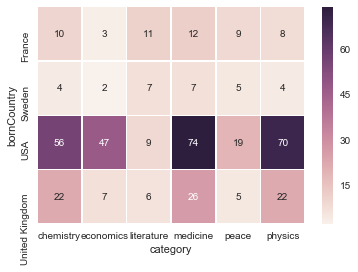

In [72]:
table = nobel2.pivot_table(values="number",index="bornCountry", columns="category",aggfunc=np.sum)
sns.heatmap(table,linewidths=.5, annot=True)

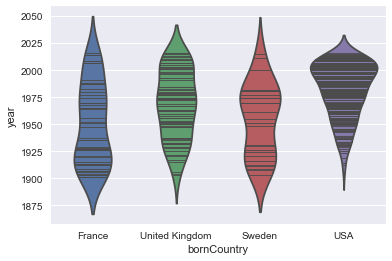

In [75]:
sns.violinplot(y="year", x="bornCountry",inner="stick", data=nobel2);

We can also use multiple conditions. Let's extract only physics prizes

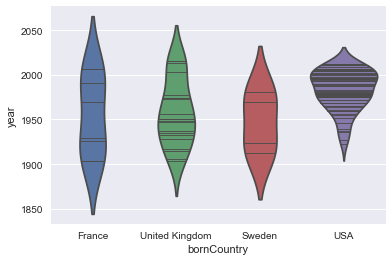

In [76]:
nobel3 = nobel.loc[nobel['bornCountry'].isin(countries) & nobel['category'].isin(['physics'])]
sns.violinplot(y="year", x="bornCountry",inner="stick", data=nobel3);

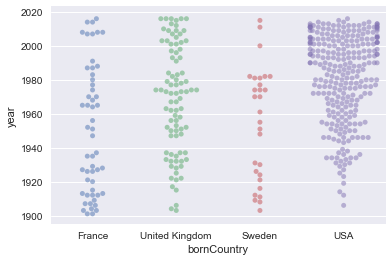

In [77]:
sns.swarmplot(y="year", x="bornCountry", data=nobel2, alpha=.5);

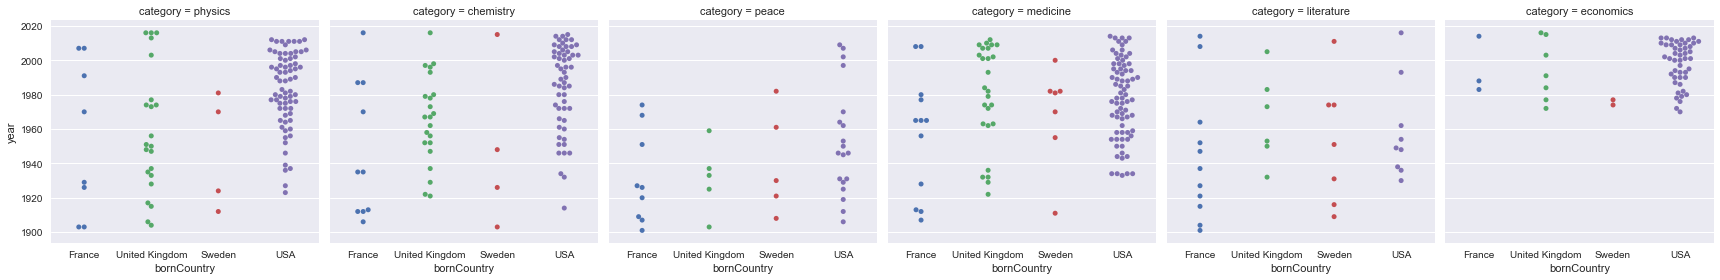

In [78]:
sns.factorplot(x="bornCountry", y="year", col="category", data=nobel2, kind="swarm");

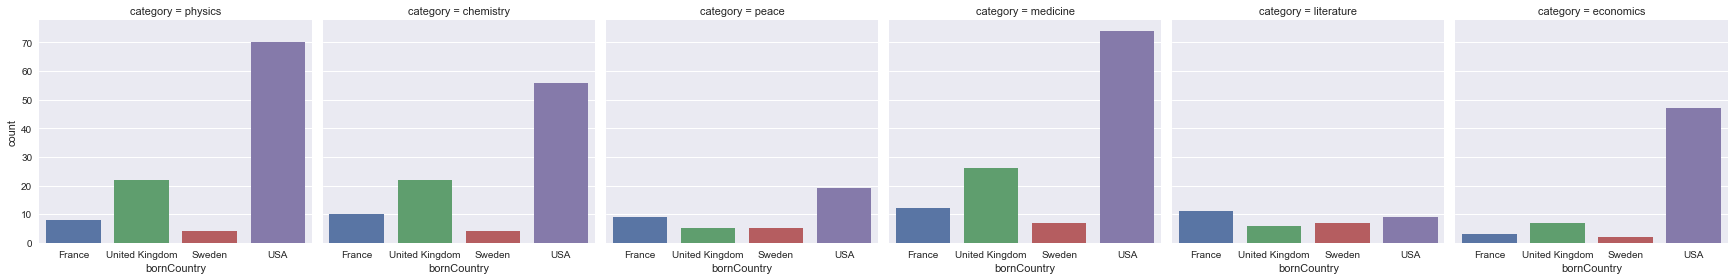

In [79]:
sns.factorplot(x="bornCountry", col="category", data=nobel2, kind="count");

### Other visualization packages
* [Plotly](https://plot.ly/) - commercial online service for creating and sharing visualizations in notebooks
* [Bokeh](http://bokeh.pydata.org/en/latest/) - web-based, general-purpose and fast visualization toolkit
* [mpld3](http://mpld3.github.io/examples/index.html)

## Other types of media

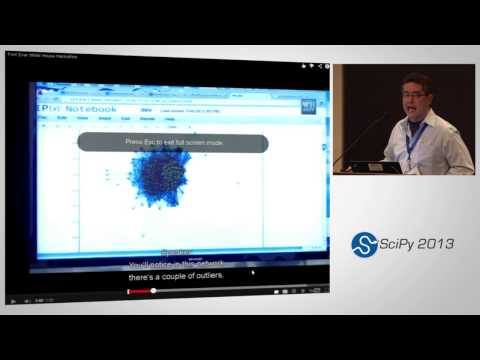

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo('j9YpkSX7NNM')

In [37]:
from IPython.display import Audio
Audio("data/GW150914_L1_whitenbp.wav")

## Plotting with Matlab/Octave

We switch to an Octave kernel. This comes with a new set of magics

In [7]:
%lsmagic

Available line magics:
%activity  %cd  %connect_info  %conversation  %dot  %download  %edit  %get  %help  %html  %include  %install  %install_magic  %javascript  %jigsaw  %kernel  %kx  %latex  %load  %ls  %lsmagic  %macro  %magic  %matplotlib  %parallel  %plot  %pmap  %px  %python  %reload_magics  %restart  %run  %scheme  %set  %shell

Available cell magics:
%%activity  %%brain  %%conversation  %%debug  %%dot  %%file  %%help  %%html  %%javascript  %%kx  %%latex  %%macro  %%pipe  %%processing  %%px  %%python  %%scheme  %%shell  %%show  %%time  %%tutor


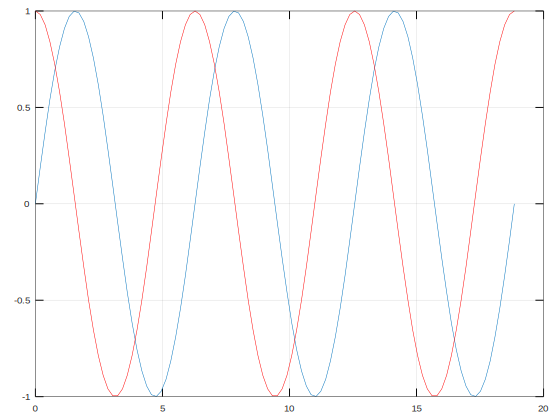

In [2]:
t = linspace(0,6*pi,100);
plot(t,sin(t))
grid on
hold on
plot(t,cos(t), 'r')

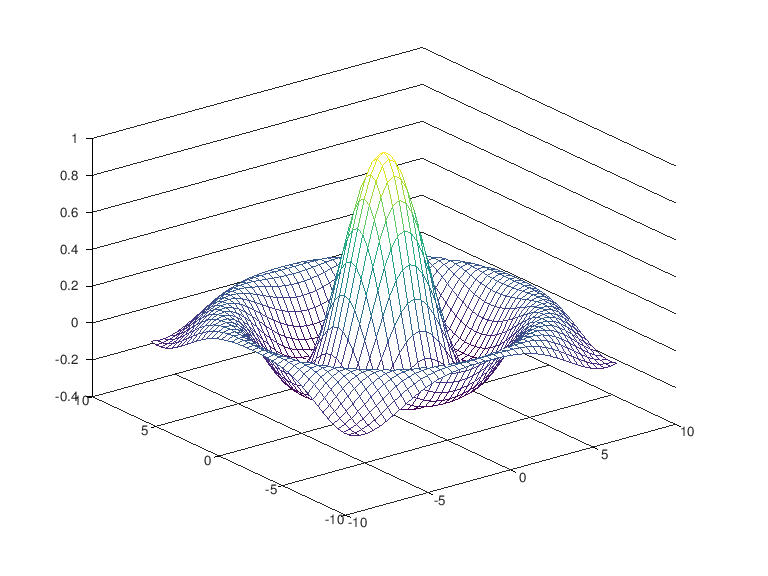

In [6]:
tx = ty = linspace (-8, 8, 41)';
[xx, yy] = meshgrid (tx, ty);
r = sqrt (xx .^ 2 + yy .^ 2) + eps;
tz = sin (r) ./ r;
mesh (tx, ty, tz);

## Plotting with R

The R world already has a powerful IDE, RStudio, where one can annotate code using Markdown and export to HTML. A key difference between RStudio and Jupyter is that in Jupyter one can modify and rerun individual cells, without having to rerun everything.

To demonstrate R, we switch to the R kernel. This comes with a new set of magics

In [3]:
%load_ext rpy2.ipython

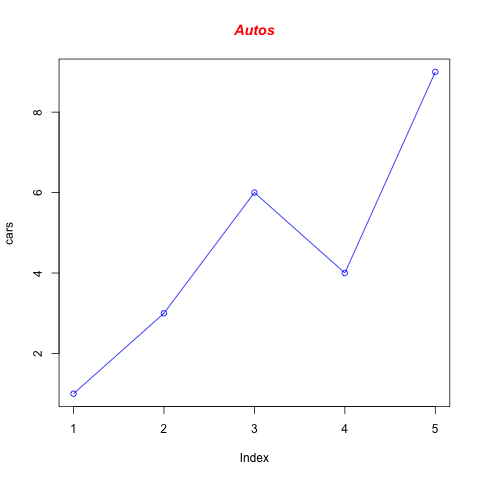

In [26]:
%%R 
# Define the cars vector with 5 values
cars <- c(1, 3, 6, 4, 9)

# Graph cars using blue points overlayed by a line 
plot(cars, type="o", col="blue")

# Create a title with a red, bold/italic font
title(main="Autos", col.main="red", font.main=4)

Data in R cells is of course persistent

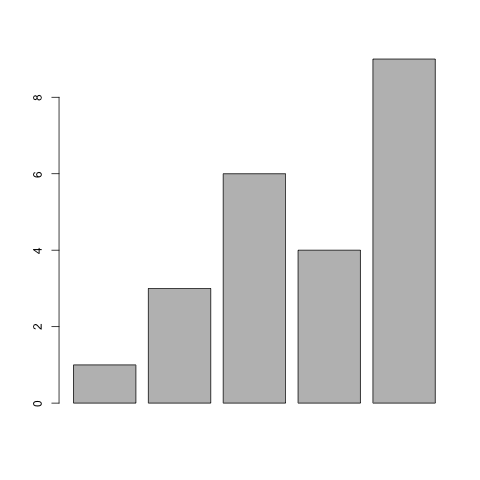

In [22]:
%%R 
barplot(cars)

We can plot a Python pandas dataframe with R code

In [8]:
import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

In [13]:
%%R?

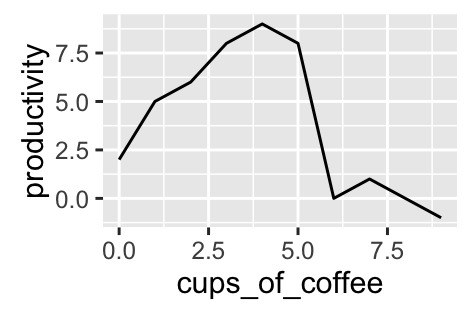

In [17]:
%%R -i df -w 6 -h 4 --units cm -r 200
# the first line says 'import df and make default figure size 5 by 5 inches 
# with resolution 200. You can change the units to px, cm, etc. as you wish.
library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()